# <font color='blue'><center> RENAN OLIVEIRA </center></font>
<center>**[renan.oliveira@databootcamp.com.br]**</center>

![alt text](http://myblog.cfbutler.net/wp-content/uploads/2013/05/Facts-or-Opinions.gif)

## Aonde estávamos?!

### Quantil / Percentil / Mediana (Revisão)

In [1]:
import pandas
titanic = pandas.read_csv("../../titanic.csv")

In [2]:
titanic.Age.quantile(0.50) #mediana

28.0

In [3]:
import numpy as np

impar = [1, 10, 3, 5, 1000]
np.median(impar) #mediana de qualquer lista

5.0

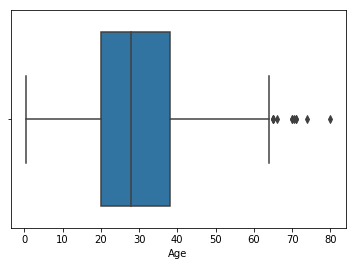

In [4]:
%matplotlib inline
import seaborn as sns

sns.boxplot(titanic.Age) #otimo grafico para analisar a distribuicao usando as marcacoes dos percentis

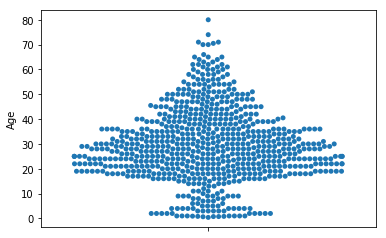

In [5]:
sns.swarmplot(titanic.Age, orient="v") #grafico que busca mostrar a incidencia dos dados

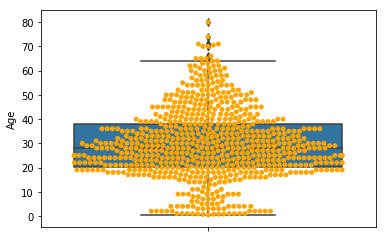

In [6]:
#podemos juntar os gráficos
sns.boxplot(titanic.Age, orient="v")
sns.swarmplot(titanic.Age, orient="v", color="orange") 

### Nós também podemos gerar vários boxplots de uma só vez

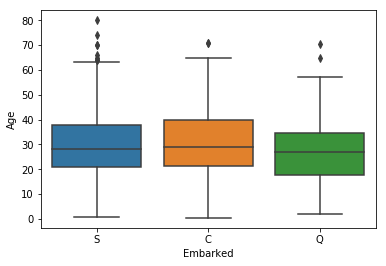

In [7]:
sns.boxplot(x=titanic.Embarked, y=titanic.Age)

-----------
### Antes de voltarmos vamos aprender mais um gráfico legal :)


## Gráfico de dispersão (scatter plot)
Gráfico de Dispersão são utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.
O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados.

O scatter plot usando seaborn pode ser feito de várisa formas. O **LMPLOT** junta o scatter plot tradicional com as retas de medição de uma regressão linear

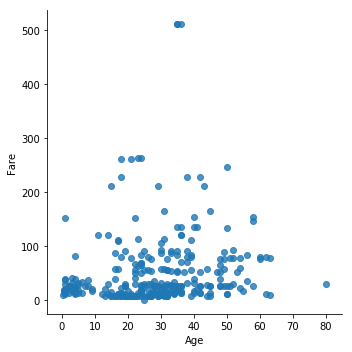

In [8]:
dados_com_vivos = titanic[titanic.Survived==1]
sns.lmplot(x="Age", y="Fare", fit_reg=False, data=dados_com_vivos)

## <font color='blue'>Como podemos colorir essas bolinhas usando a Pclass? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

Para colorir temos o **hue** (em português seria matiz)

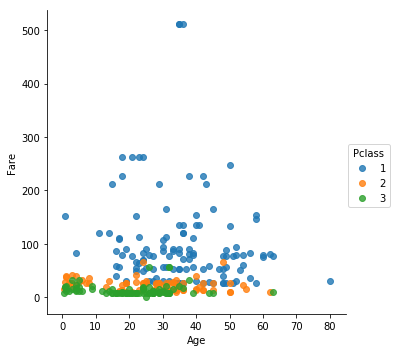

In [9]:
sns.lmplot(data=dados_com_vivos, x="Age", y="Fare", hue='Pclass', fit_reg=False)

#### O lmplot permite gerar gráficos separados por colunas
#### Vamos gerar um gráfico para quem sobreviveu e outro para não

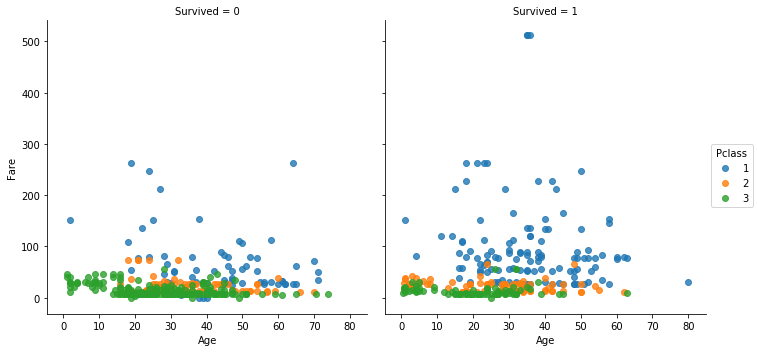

In [10]:
sns.lmplot(data=titanic, x="Age", y="Fare", hue='Pclass', col="Survived", fit_reg=False)

---------
## Métricas
## Moda

É o valor da distribuição que ocorre com a maior frequência, ou seja, o valor que mais se repete dentro de uma série de observações. 

![alt text](http://www.statisticshowto.com/wp-content/uploads/2013/09/histogram.gif)

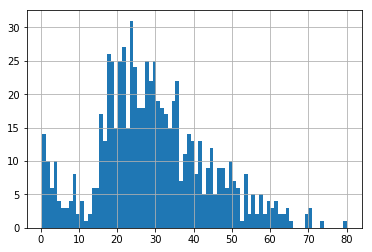

In [11]:
titanic.Age.hist(bins=80)

In [12]:
titanic.Age.mode() #a moda retorna uma lista pois podemos ter mais um de um elemento no top

0    24.0
dtype: float64

#### Para pegarmos uma moda só podemos pegar a primeira

In [13]:
titanic.Age.mode()[0]

24.0

## Com essas informações (Média, Mediana e Moda) vemos a assimetria de uma distribuição

![alt text](http://www.durofy.com/wp-content/uploads/2013/07/mode3.png)

Se **Média < Mediana < Moda**, tem a calda tendendo a esquerda (negativa)

Se **Média == Mediana == Moda**, então a distribuição é aproximadamente simétrica (ou também conhecida como normal)

Se **Média > Mediana > Moda**, tem a calda tendendo a direita (positiva)

## <font color='blue'>Faça uma função que retorne a assimetria de qualquer coluna (Serie) :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [14]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    media = coluna.mean()
    mediana = coluna.median()
    
    if (media < mediana < moda):
        print("negativo")
    elif (media > mediana > moda):
        print("positivo")
    else:
        print("simetrico")

In [15]:
assimetria(titanic.Age)

positivo


In [16]:
moda = titanic.Age.mode()
media = titanic.Age.mean()
mediana = titanic.Age.median()

print("moda:", moda[0]) 
print("mediana:", mediana)
print("media:", media)

moda: 24.0
mediana: 28.0
media: 29.6991176471


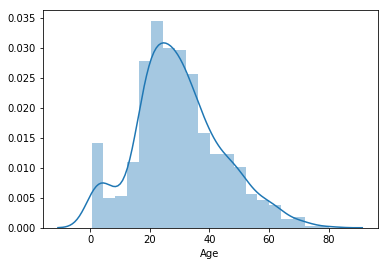

In [17]:
sns.distplot(titanic.Age.dropna())

---------------
## Medidas de dispersão

## Amplitude ou Range

É a diferença entre o maior e o menor valor do conjunto de dados.

![alt text](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/ebe2.2-650x132.png)

In [18]:
exemplo = [10, 11, 12, 14, 15, 20, 30, 40, 45, 50]

menor = min(exemplo)
maior = max(exemplo)
print("amplitude", maior-menor)

amplitude 40


In [19]:
titanic.Age.max() - titanic.Age.min()

79.579999999999998

In [20]:
jogadas = pandas.read_csv("http://bit.ly/jogadas-bc")
jogadas[:3]

,exp
0,24
1,25
2,28


In [21]:
jogadas.exp.max() - jogadas.exp.min()

29

## Variância
É uma medida de dispersão quadratica que mostra o quão distante cada valor desse conjunto está do valor central.

O cálculo da variância populacional é obtido através da soma dos quadrados da diferença entre cada valor e a média aritmética, dividida pela quantidade de elementos observados. 

![alt text](https://www.wikihow.com/images/thumb/a/a7/Calculate-Variance-Step-10.jpg/aid867321-v4-728px-Calculate-Variance-Step-10.jpg)

### Como podemos tirar no GREGO e colocar em código?

In [22]:
def variancia(lista):
    n = len(lista) # 5
    mu = np.mean(lista) #10
    numerador = 0
    for i in lista:
        numerador += (i - mu) ** 2
    return numerador/n

variancia([10, 20])

25.0

#### Algoritimo pedestre para debugar como funciona o calcula da variancia

In [23]:
#exemplo para [10, 20]
n = 2 #quantidade
mu = 15 #media

numerador1 = (10 - 15) ** 2
print("1->", numerador1)
numerador2 = (20 - 15) ** 2
print("2->", numerador2)

total = numerador1+numerador2
print(total/n)


1-> 25
2-> 25
25.0


![alt text](https://i.imgur.com/6y9Vnsw.png)

** Quanto menor é a variância, mais próximos os valores estão da média. **
![alt text](https://swh-826d.kxcdn.com/wp-content/uploads/2010/10/bell_curve_normal-curve.gif)

In [24]:
jogadas.exp.std()

3.5367702236464695

In [25]:
jogadas.exp.mean()

25.021599999999999

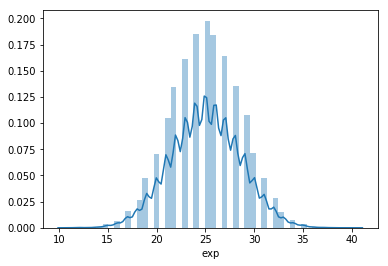

In [26]:
sns.distplot(jogadas.exp)

In [27]:
titanic.Age.var()

211.01912474630802

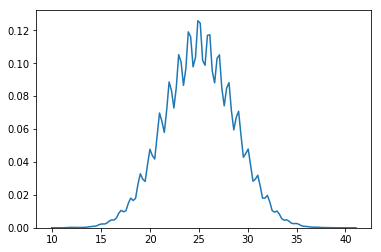

In [28]:
sns.distplot(jogadas, hist=False)

In [29]:
jogadas.exp.var()

12.508743614872298

In [30]:
lista_de_exemplo = [1, 1]
np.var(lista_de_exemplo)

0.0

## Desvio Padrão - stddev

O desvio padrão é capaz de identificar o “erro” em um conjunto de dados, caso quiséssemos substituir um dos valores coletados pela média aritmética.

**desvio_padrao = √variancia**

![alt text](http://www.statisticshowto.com/wp-content/uploads/2012/11/standard-deviation-examples1.png)

In [31]:
titanic.Age.std()

14.526497332334042

In [32]:
jogadas.exp.std()

3.5367702236464695

In [33]:
lista_de_exemplo = [1, 1]
np.std(lista_de_exemplo)

0.0

Podemos ver a utilização do desvio padrão na apresentação da média aritmética, informando o quão “confiável” é esse valor.

**média aritmética (x) ± desvio padrão (dp)**

**25 ± 3.53** 

-------------
## Vamos falar sobre a famosa AMOSTRA ...

## Inferência estatística
É um conjunto de técnicas que visam estudar uma população através de evidências fornecidas por uma amostra (sample)

## Como selecionar/extrair uma amostra?

### O que costumo fazer é olhar a distribuíção!

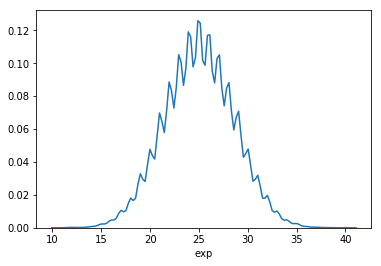

In [34]:
jog = jogadas.exp
sns.distplot(jog, hist=False)

### O pandas nos entrega uma função de amostra (sample) nela podemos passar a fração da distribuição

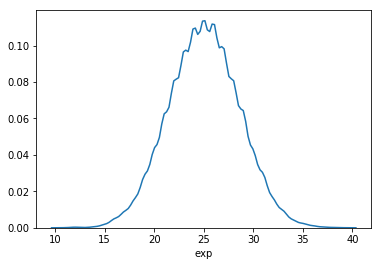

In [35]:
amostra = jog.sample(frac=0.33)
sns.distplot(amostra, hist=False)

### Uma coisa que sempre vejo é se as curvas estão parecidas

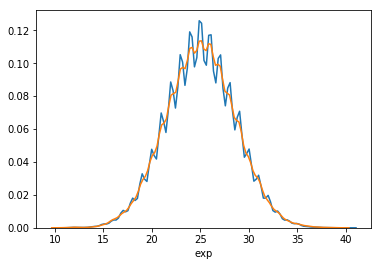

In [36]:
sns.distplot(jog, hist=False)
sns.distplot(amostra, hist=False)

### Outra forma é ver as médias dos dados

In [37]:
print(jog.mean())
print(amostra.mean())

25.0216
25.0304848485


### Junto com o desvio padrão a gente consegue ver se os erros continuam iguais

In [38]:
print(jog.std())
print(amostra.std())

3.53677022365
3.54419908009


## <font color='blue'>Gere uma amostra representativa para as idade no titanic :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

## LIVE CODE!

## Intervalo de Confiança + Margem de erro (a largura entre a média e os valores do intervalo)

O nível de confiança é a frequência com a qual o intervalo observado contém o parâmetro real de interesse quando o experimento é repetido várias vezes. 
Os intervalos de confiança são tipicamente estabelecidos no nível de confiança de 95%.

In [39]:
from scipy import stats

mu = np.mean(jogadas.exp)
sigma = np.std(jogadas.exp)

print(mu)
print(sigma)
 
#A location (loc) é uma média.
#A escala (scale) é o desvio padrão.
 
stats.norm.interval(0.95,loc=mu,scale=sigma) #95% dos valores das médias estão nesse range

25.0216
3.53673485577


(18.089727059828448, 31.953472940171551)

## Teste de Hipótese 

### T Test para comparação entre amostras

O teste t de Student ou somente teste t é um teste de hipótese que usa conceitos estatísticos para rejeitar ou não uma hipótese nula quando a estatística de teste segue uma distribuição t de Student. Essa premissa é normalmente usada quando a estatística de teste, na verdade, segue uma distribuição normal, mas a variância da população sigma-quadratica é desconhecida.

#### As duas amostras são estatisticamente iguais?

**Hipotese nula:** amostra 1 é estatisticamente igual a amostra 2

**Hipotese alternativa:** amostra 1 é estatisticamente diferente da amostra 2

Calculates the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [40]:
amostra1 = jogadas.exp.sample(frac=0.001)
amostra2 = jogadas.exp.sample(frac=0.0001)

s, pvalue = stats.ttest_ind(amostra1, amostra2)

if(pvalue >= 0.05):
    print("Não rejeito! As médias são iguais estatisticamente com 95% de confianca!")
    print(amostra1.mean(), amostra2.mean())
else:
    print("Rejeito que as médias são iguais estatisticamente com 95% de confianca!")
    print(amostra1.mean(), amostra2.mean())

Não rejeito! As médias são iguais estatisticamente com 95% de confianca!
26.08 27.0


### Teste do chi-quadrado para validação de hipóteses

Primeiro vamos responder a seguinte pergunta:
#### A classe do passageiro influencia a taxa de sobrevivencia?

**Hipotese nula:** a taxa de sobrevivencia é independente da classe

**Hipotese alternativa:** a taxa de sobrevivencia depende da classe

In [1]:
tabela_de_frequencia = pandas.crosstab(titanic.Survived, titanic.Pclass)
chi2, pvalue, dof, expected = stats.chi2_contingency(tabela_de_frequencia.values)

NameError: name 'pandas' is not defined

In [42]:
tabela_de_frequencia

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [43]:
if(pvalue >= 0.05):
    print("Não rejeito a hipotese")
    print("Essas variáveis são independentes - não há interferência")
else:
    print("Rejeito a hipotese!")
    print("Essas variáveis são dependentes - quando a classe muda interfere na sobrevivência")

Rejeito a hipotese!
Essas variáveis são dependentes - quando a classe muda interfere na sobrevivência
